## TASK 6.5 - Unsupervised Machine Learning: Clustering

### 1. Install and import libraries and files.
### 2. Cleaning data.
### 3. The Elbow technique.
### 4. Clustering.
### 5. Run the k-means algorithm.
### 6. Attach new column with the resulting clusters.
### 7. Visualizations.
### 8. Discuss how and why the clusters make sense. 
### 9. Descriptive statistics for clusters.
### 10. Usefulness of results.

## 1. Install and import libraries and files.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Display graphs
%matplotlib inline

In [3]:
# Import data:
# Create string of location
path = '/Users/aegarcia/Desktop/Data analytics/6. Adv Analytics & Dasboard design'
# Import accidents data
df_car = pd.read_csv(os.path.join(path, '2 Data', 'Prepared data', 'accidents_clean3.csv'), index_col = False)
df_acc_state = pd.read_csv(os.path.join(path, '2 Data', 'Original data', 'accidents_per_state.csv'), index_col = False)

## 2. Cleaning data - use only numeric data & standardize data.

In [4]:
df_car.shape

(34208, 32)

In [5]:
# Check names of columns
df_car.columns

Index(['Unnamed: 0', 'number', 'state', 'date', 'weekday', 'county', 'time',
       'hour', 'total_vehicles', 'persons', 'fatalities', 'route_type',
       'urban_rural', 'driver_age', 'driver_gender', 'driver_license',
       'car_year', 'car_make', 'car_model', 'speed_limit', 'above_limit',
       'weather', 'driver_drugs', 'drug_category', 'type_drugs',
       'driver_alcohol', 'alcohol_level (%)', 'death_race', 'age_range',
       'speed_range', 'drug_alcohol_use', 'weekday_no'],
      dtype='object')

In [6]:
# Drop the first columns
df_car = df_car.drop(columns = ['Unnamed: 0'])

In [7]:
# Check columns again
df_car.columns

Index(['number', 'state', 'date', 'weekday', 'county', 'time', 'hour',
       'total_vehicles', 'persons', 'fatalities', 'route_type', 'urban_rural',
       'driver_age', 'driver_gender', 'driver_license', 'car_year', 'car_make',
       'car_model', 'speed_limit', 'above_limit', 'weather', 'driver_drugs',
       'drug_category', 'type_drugs', 'driver_alcohol', 'alcohol_level (%)',
       'death_race', 'age_range', 'speed_range', 'drug_alcohol_use',
       'weekday_no'],
      dtype='object')

In [8]:
# Check how data looks like
pd.options.display.max_columns = None
df_car.head()

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range,speed_range,drug_alcohol_use,weekday_no
0,0,Alabama,"January 1, 2020",Wednesday,ELMORE,2:58,2,1,4,3,County Road,Rural,24,Male,Suspended,1997.0,Lexus,ES,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.294,Black or African American,Young adult,31 - 59 mph,alcohol,3.0
1,1,Alabama,"January 2, 2020",Thursday,JEFFERSON,17:18,17,4,6,1,Local Street,Urban,40,Female,Suspended,1993.0,Chevrolet,Corsica,35,No,Rain,Yes,Opioid,FENTANYL,No,0.000,Not a Fatality (not Applicable),Adult,31 - 59 mph,drugs,4.0
2,2,Alabama,"January 2, 2020",Thursday,SHELBY,14:55,14,2,2,1,State Highway,Rural,34,Female,Revoked,1995.0,Toyota,Camry,65,Yes,Rain,No,No drug,Test Not Given,No,0.000,White,Young adult,60mph and above,none,4.0
3,3,Alabama,"January 3, 2020",Friday,CALHOUN,15:20,15,1,5,1,County Road,Rural,17,Male,Valid,2007.0,Hyundai,Azera,35,Yes,Cloudy,Yes,Depressant,DELTA 9,No,0.000,Not a Fatality (not Applicable),Teenager,31 - 59 mph,drugs,5.0
4,4,Alabama,"January 4, 2020",Saturday,COOSA,0:45,0,1,1,1,County Road,Rural,47,Female,Valid,2013.0,GMC,Yukon,45,No,Rain,No,No drug,Test Not Given,No,0.000,White,Adult,31 - 59 mph,none,6.0


In [9]:
# Check for any missing values
df_car.isnull().sum()

number               0
state                0
date                 0
weekday              0
county               0
time                 0
hour                 0
total_vehicles       0
persons              0
fatalities           0
route_type           0
urban_rural          0
driver_age           0
driver_gender        0
driver_license       0
car_year             0
car_make             0
car_model            0
speed_limit          0
above_limit          0
weather              0
driver_drugs         0
drug_category        0
type_drugs           0
driver_alcohol       0
alcohol_level (%)    0
death_race           0
age_range            0
speed_range          0
drug_alcohol_use     0
weekday_no           0
dtype: int64

In [10]:
# Check for any duplicates
dups = df_car.duplicated()
dups

0        False
1        False
2        False
3        False
4        False
         ...  
34203    False
34204    False
34205    False
34206    False
34207    False
Length: 34208, dtype: bool

In [11]:
dups.shape

(34208,)

### No duplicates and no missing values! 

In [12]:
# I will give a numeric value to the use of drugs/alcohol so it can be part of this analysis and hopefuly discover something!
df_car.loc[df_car['drug_alcohol_use'] == 'drugs', 'drug_use'] = '1'
df_car.loc[df_car['drug_alcohol_use'] == 'alcohol', 'drug_use'] = '2'
df_car.loc[df_car['drug_alcohol_use'] == 'both', 'drug_use'] = '3'
df_car.loc[df_car['drug_alcohol_use'] == 'none', 'drug_use'] = '0'

In [13]:
df_car['drug_use'].value_counts(dropna=False)

0    22935
1     4494
2     3917
3     2862
Name: drug_use, dtype: int64

## 3. The Elbow Technique.

In [14]:
# Create a subset of numeric data

sub = df_car[['hour', 'total_vehicles', 'persons', 'fatalities', 'driver_age', 'car_year', 'speed_limit', 'alcohol_level (%)', 'weekday_no', 'drug_use']]

In [15]:
# Define range of potential clusters 
num_cl = range(1, 10) 
# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [16]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-21257102.599833373,
 -12779984.457055917,
 -9966661.228741089,
 -8595057.378817169,
 -7610542.466927329,
 -7064869.554681783,
 -6646536.385746472,
 -6262792.295970069,
 -5969082.2079782225]

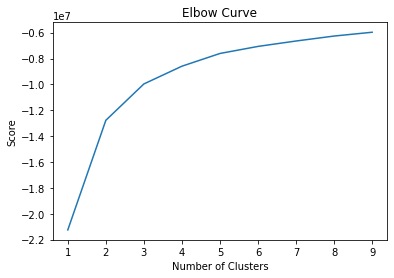

In [17]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Clustering. Explain why the number of clusters is chosen

### I believe I will chose 4 clusters, that is where the curve started to look more like a line, instead of a curve.

## 5. Run the k-means algorithm.

In [18]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [19]:
# Fit the k-means object to the data.
kmeans.fit(sub)

/Users/aegarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

## 6. Attach new column with the resulting clusters.

In [20]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/aegarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-20-97c7b350e8f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [21]:
# Check that the column named "clusters" is included on data
sub.head()

,hour,total_vehicles,persons,fatalities,driver_age,car_year,speed_limit,alcohol_level (%),weekday_no,drug_use,clusters
0,2,1,4,3,24,1997.0,45,0.294,3.0,2,1
1,17,4,6,1,40,1993.0,35,0.000,4.0,1,1
2,14,2,2,1,34,1995.0,65,0.000,4.0,0,2
3,15,1,5,1,17,2007.0,35,0.000,5.0,1,1
4,0,1,1,1,47,2013.0,45,0.000,6.0,0,3


In [22]:
# Counts for each cluster
sub['clusters'].value_counts()

2    10787
1    10285
0     6894
3     6242
Name: clusters, dtype: int64

## 7. Visualizations.

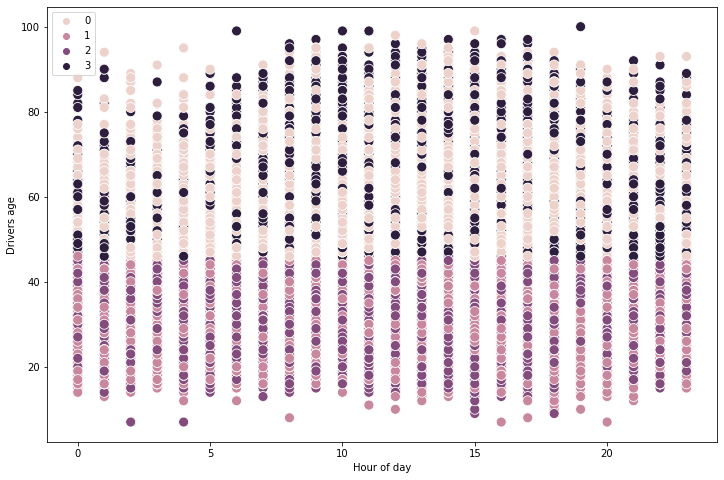

In [23]:
# Plot the clusters for hour of the day VS driver's age.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['hour'], y = sub['driver_age'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Hour of day') 
plt.ylabel('Drivers age') 
plt.show()

### This is allowing me to see some patterns on the clusters. It seems like clusters 0 and 3 are people 45 and younger, while clusters 1 and 2 are people older than 45 years of age. 

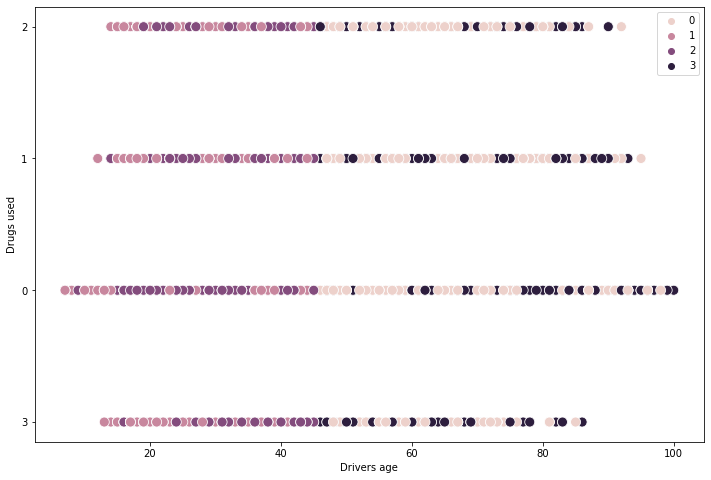

In [24]:
# Plot the clusters for driver's age VS drug_use
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['driver_age'], y = sub['drug_use'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Drivers age') 
plt.ylabel('Drugs used') 
plt.show()
# KEY for drug used: 0=none, 1=drugs 2=alcohol, 3=both

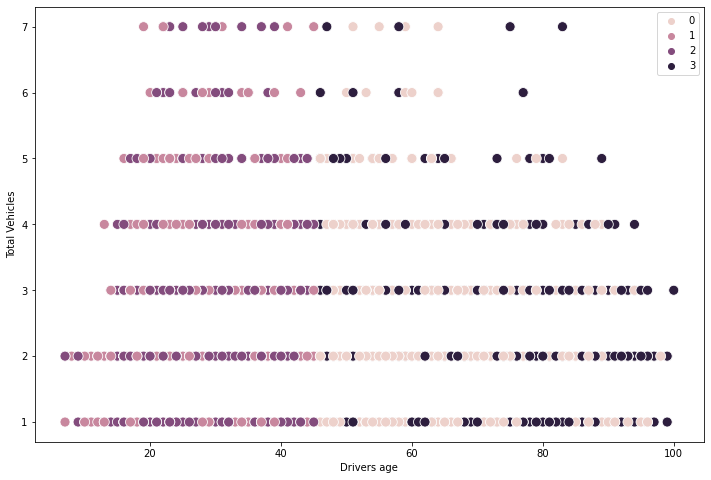

In [25]:
# Plot the clusters for driver's age VS total vehicles
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['driver_age'], y = sub['total_vehicles'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Drivers age') 
plt.ylabel('Total Vehicles') 
plt.show()

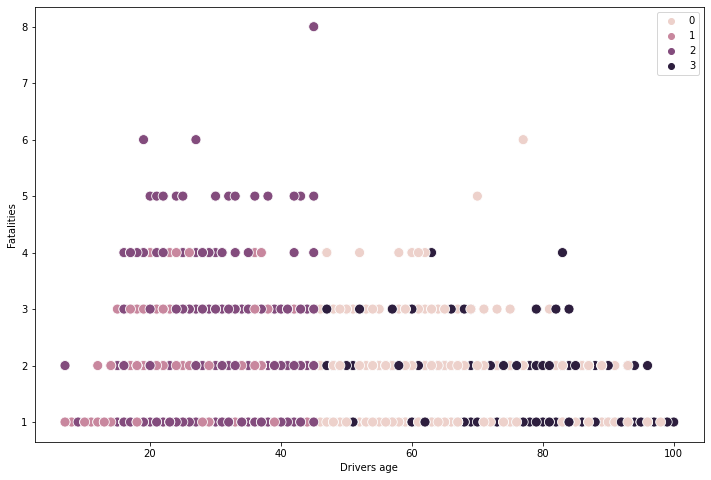

In [26]:
# Plot the clusters for driver's age VS fatalities
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['driver_age'], y = sub['fatalities'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Drivers age') 
plt.ylabel('Fatalities') 
plt.show()

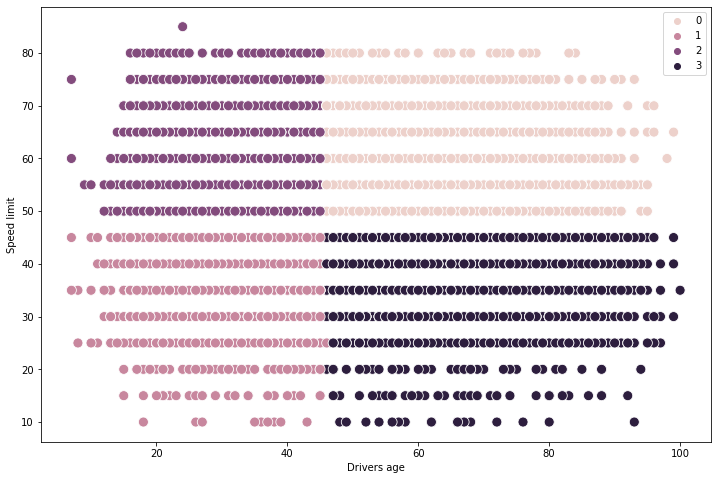

In [27]:
# Plot the clusters for driver's age VS speed limit
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['driver_age'], y = sub['speed_limit'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Drivers age') 
plt.ylabel('Speed limit') 
plt.show()

### Here it is, this is how the data was clustered!!! By age and speed limit of the street where the accident tookplace. 

## 8. Discuss how and why the clusters make sense. 

### Clustering data makes us see patterns that otherwise we could have missed. Using this set of data I know that the cluster represents a classification of 2 variables (age & speed). So now I can graph other variables and see the behavior of all of them together, possibly giving me a good insight! 

## 9. Descriptive statistics for clusters.

In [28]:
sub.loc[sub['clusters'] == 0, 'cluster'] = 'young & slow'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'old & slow'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'old & fast'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'young & fast'

/Users/aegarcia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/aegarcia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/aegarcia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [32]:
sub.groupby('cluster').agg({'persons' : ['mean', 'median'],
                            'total_vehicles' : ['mean', 'median'],
                            'fatalities' : ['mean', 'median'],
                            'alcohol_level (%)' : ['mean', 'median'],
                            'weekday_no' : ['mean', 'median']})

persons        total_vehicles        fatalities         \
                  mean median           mean median       mean median   
cluster                                                                 
old & fast    2.358487      2       1.595902      1   1.121350      1   
old & slow    2.160525      2       1.513175      1   1.075255      1   
young & fast  1.886575      1       1.513457      1   1.040051      1   
young & slow  2.108355      2       1.594865      1   1.088628      1   

             alcohol_level (%)        weekday_no         
                          mean median       mean median  
cluster                                                  
old & fast            0.041257    0.0   4.280801    5.0  
old & slow            0.039632    0.0   4.280408    5.0  
young & fast          0.025400    0.0   4.067286    4.0  
young & slow          0.028108    0.0   4.097476    4.0

## 10. Usefulness of results.

### This is neat because we notice we are grouping our data already by age and speed limit of the street the accident took place, so now we can see that younger people that drive on fast streets and get in an accident tend to get in an accident them being the only person and car involved than for the rest of the people. We can also see that the alcohol level is on average higher on older people than it is on younger people (<45yrs)

In [ ]:
# Export data
sub.to_csv(os.path.join(path, '2 Data','Prepared data', 'numeric_data.csv'))

### The END! :)